**1. Problem defition**

We want to predict the price of an Airbnb house, given its attributes.

**2. Data**

listings.csv is the dataset

**3. Evaluation**

The metrics we  use for evaluating the results are Mean Absolute Error, Mean Absolute Percentage Error

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('listings.csv', parse_dates=['host_since'])

In [6]:
df.shape

(9582, 67)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            9582 non-null   int64         
 1   listing_url                                   9582 non-null   object        
 2   scrape_id                                     9582 non-null   int64         
 3   last_scraped                                  9582 non-null   object        
 4   name                                          9579 non-null   object        
 5   description                                   9486 non-null   object        
 6   neighborhood_overview                         6622 non-null   object        
 7   picture_url                                   9582 non-null   object        
 8   host_id                                       9582 non-null   int64 

In [8]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [9]:
df = df[['host_since','host_is_superhost', 'host_listings_count', 'host_identity_verified',
        'neighbourhood_cleansed', 'latitude',
        'longitude', 'property_type', 'room_type', 'accommodates',
        'bathrooms_text', 'beds', 'amenities', 'price',
        'minimum_nights', 'maximum_nights', 'has_availability',
        'availability_30', 'availability_60', 'availability_90',
        'availability_365', 'number_of_reviews',
        'number_of_reviews_ltm', 'number_of_reviews_l30d', 'license', 'instant_bookable', 'reviews_per_month']]

In [10]:
df.shape

(9582, 27)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   host_since              9579 non-null   datetime64[ns]
 1   host_is_superhost       9579 non-null   object        
 2   host_listings_count     9579 non-null   float64       
 3   host_identity_verified  9579 non-null   object        
 4   neighbourhood_cleansed  9582 non-null   object        
 5   latitude                9582 non-null   float64       
 6   longitude               9582 non-null   float64       
 7   property_type           9582 non-null   object        
 8   room_type               9582 non-null   object        
 9   accommodates            9582 non-null   int64         
 10  bathrooms_text          9572 non-null   object        
 11  beds                    9514 non-null   float64       
 12  amenities               9582 non-null   object  

In [12]:
df['price'] = df['price'].str.replace('.', '').str.replace('$', '').str.replace(',', '').astype(int) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [13]:
df['price'] = df['price'] // 100

In [15]:
df.head().T

,0,1,2,3,4
host_since,2009-09-08 00:00:00,2009-09-08 00:00:00,2009-09-08 00:00:00,2009-09-08 00:00:00,2009-09-08 00:00:00
host_is_superhost,t,t,t,t,t
host_listings_count,6.0,6.0,6.0,6.0,6.0
host_identity_verified,t,t,t,t,t
neighbourhood_cleansed,ΑΜΠΕΛΟΚΗΠΟΙ,ΑΜΠΕΛΟΚΗΠΟΙ,ΑΜΠΕΛΟΚΗΠΟΙ,ΑΜΠΕΛΟΚΗΠΟΙ,ΑΜΠΕΛΟΚΗΠΟΙ
latitude,37.98863,37.98903,37.98888,37.98903,37.98924
longitude,23.76527,23.76448,23.76473,23.76448,23.765
property_type,Entire rental unit,Entire rental unit,Entire rental unit,Entire rental unit,Entire rental unit
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
accommodates,8,4,2,4,4


In [16]:
df.isna().sum()

host_since                   3
host_is_superhost            3
host_listings_count          3
host_identity_verified       3
neighbourhood_cleansed       0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms_text              10
beds                        68
amenities                    0
price                        0
minimum_nights               0
maximum_nights               0
has_availability             0
availability_30              0
availability_60              0
availability_90              0
availability_365             0
number_of_reviews            0
number_of_reviews_ltm        0
number_of_reviews_l30d       0
license                   1922
instant_bookable             0
reviews_per_month         1708
dtype: int64

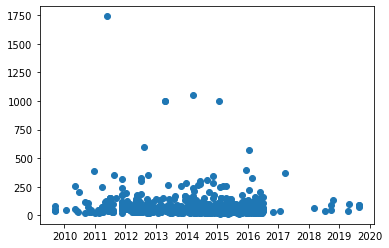

In [17]:
fig, ax = plt.subplots()
ax.scatter(df['host_since'][:1000], df['price'][:1000])

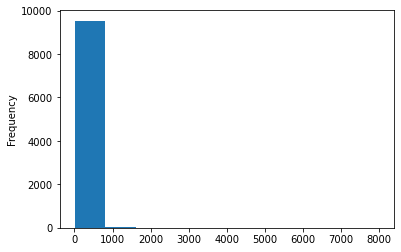

In [18]:
df.price.plot.hist()

In [19]:
# sort df by host_since
df.sort_values(by=['host_since'], inplace=True, ascending=True)
df.host_since.head(10)

0      2009-09-08
1      2009-09-08
2      2009-09-08
3      2009-09-08
4      2009-09-08
202    2009-09-08
156    2010-01-15
2540   2010-04-02
97     2010-05-09
5      2010-05-09
Name: host_since, dtype: datetime64[ns]

In [20]:
# make a copy 
df_tmp = df.copy()

In [21]:
# add datetime parameters for host_since column
df_tmp['hostYear'] = df_tmp.host_since.dt.year
df_tmp['hostMonth'] = df_tmp.host_since.dt.month
df_tmp['hostDay'] = df_tmp.host_since.dt.day
df_tmp['hostDayOfWeek'] = df_tmp.host_since.dt.dayofweek
df_tmp['hostDayOfYear'] = df_tmp.host_since.dt.dayofyear

In [22]:
df_tmp.drop("host_since", axis=1, inplace=True)

In [23]:
df_tmp.head().T

,0,1,2,3,4
host_is_superhost,t,t,t,t,t
host_listings_count,6.0,6.0,6.0,6.0,6.0
host_identity_verified,t,t,t,t,t
neighbourhood_cleansed,ΑΜΠΕΛΟΚΗΠΟΙ,ΑΜΠΕΛΟΚΗΠΟΙ,ΑΜΠΕΛΟΚΗΠΟΙ,ΑΜΠΕΛΟΚΗΠΟΙ,ΑΜΠΕΛΟΚΗΠΟΙ
latitude,37.98863,37.98903,37.98888,37.98903,37.98924
longitude,23.76527,23.76448,23.76473,23.76448,23.765
property_type,Entire rental unit,Entire rental unit,Entire rental unit,Entire rental unit,Entire rental unit
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
accommodates,8,4,2,4,4
bathrooms_text,2 baths,1 bath,1 bath,1 bath,1 bath


In [24]:
df_tmp.neighbourhood_cleansed.value_counts()

ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              1866
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                  841
ΝΕΟΣ ΚΟΣΜΟΣ                          713
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             699
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     599
ΠΑΓΚΡΑΤΙ                             383
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      381
ΚΟΛΩΝΑΚΙ                             330
ΑΜΠΕΛΟΚΗΠΟΙ                          329
ΑΚΡΟΠΟΛΗ                             319
ΘΗΣΕΙΟ                               294
ΚΕΡΑΜΕΙΚΟΣ                           244
ΣΤΑΔΙΟ                               223
ΠΕΤΡΑΛΩΝΑ                            214
ΚΥΨΕΛΗ                               201
ΙΛΙΣΙΑ                               172
ΓΟΥΔΙ                                162
ΖΑΠΠΕΙΟ                              141
ΠΑΤΗΣΙΑ                              117
ΛΥΚΑΒΗΤΤΟΣ                           117
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     116
ΝΙΡΒΑΝΑ                              105
ΓΚΥΖΗ                                 88
ΚΟΛΩΝΟΣ                               82
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ 

In [25]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9582 entries, 0 to 5459
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_is_superhost       9579 non-null   object 
 1   host_listings_count     9579 non-null   float64
 2   host_identity_verified  9579 non-null   object 
 3   neighbourhood_cleansed  9582 non-null   object 
 4   latitude                9582 non-null   float64
 5   longitude               9582 non-null   float64
 6   property_type           9582 non-null   object 
 7   room_type               9582 non-null   object 
 8   accommodates            9582 non-null   int64  
 9   bathrooms_text          9572 non-null   object 
 10  beds                    9514 non-null   float64
 11  amenities               9582 non-null   object 
 12  price                   9582 non-null   int64  
 13  minimum_nights          9582 non-null   int64  
 14  maximum_nights          9582 non-null   

In [26]:
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

host_is_superhost
host_identity_verified
neighbourhood_cleansed
property_type
room_type
bathrooms_text
amenities
has_availability
license
instant_bookable


In [27]:
# convert strings to categories
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label] = content.astype("category").cat.as_ordered()

In [28]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9582 entries, 0 to 5459
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   host_is_superhost       9579 non-null   category
 1   host_listings_count     9579 non-null   float64 
 2   host_identity_verified  9579 non-null   category
 3   neighbourhood_cleansed  9582 non-null   category
 4   latitude                9582 non-null   float64 
 5   longitude               9582 non-null   float64 
 6   property_type           9582 non-null   category
 7   room_type               9582 non-null   category
 8   accommodates            9582 non-null   int64   
 9   bathrooms_text          9572 non-null   category
 10  beds                    9514 non-null   float64 
 11  amenities               9582 non-null   category
 12  price                   9582 non-null   int64   
 13  minimum_nights          9582 non-null   int64   
 14  maximum_nights          

In [29]:
df_tmp.neighbourhood_cleansed.cat.categories

Index(['1Ο ΝΕΚΡΟΤΑΦΕΙΟ', 'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ',
       'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ', 'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ',
       'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ', 'ΑΚΡΟΠΟΛΗ', 'ΑΜΠΕΛΟΚΗΠΟΙ', 'ΑΝΩ ΚΥΨΕΛΗ',
       'ΑΝΩ ΠΑΤΗΣΙΑ', 'ΒΟΤΑΝΙΚΟΣ', 'ΓΚΑΖΙ', 'ΓΚΥΖΗ', 'ΓΟΥΒΑ', 'ΓΟΥΔΙ',
       'ΕΛΛΗΝΟΡΩΣΩΝ', 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ', 'ΖΑΠΠΕΙΟ', 'ΘΗΣΕΙΟ', 'ΙΛΙΣΙΑ',
       'ΚΕΡΑΜΕΙΚΟΣ', 'ΚΟΛΟΚΥΝΘΟΥ', 'ΚΟΛΩΝΑΚΙ', 'ΚΟΛΩΝΟΣ',
       'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ', 'ΚΥΨΕΛΗ', 'ΛΥΚΑΒΗΤΤΟΣ',
       'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ', 'ΝΕΑ ΚΥΨΕΛΗ', 'ΝΕΟΣ ΚΟΣΜΟΣ', 'ΝΙΡΒΑΝΑ',
       'ΠΑΓΚΡΑΤΙ', 'ΠΑΤΗΣΙΑ', 'ΠΕΔΙΟ ΑΡΕΩΣ', 'ΠΕΝΤΑΓΩΝΟ', 'ΠΕΤΡΑΛΩΝΑ',
       'ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ', 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ', 'ΠΟΛΥΓΩΝΟ', 'ΠΡΟΜΠΟΝΑ',
       'ΡΗΓΙΛΛΗΣ', 'ΡΙΖΟΥΠΟΛΗ', 'ΣΕΠΟΛΙΑ', 'ΣΤΑΔΙΟ', 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ'],
      dtype='object')

In [30]:
df_tmp.neighbourhood_cleansed.value_counts()

ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              1866
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                  841
ΝΕΟΣ ΚΟΣΜΟΣ                          713
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             699
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     599
ΠΑΓΚΡΑΤΙ                             383
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      381
ΚΟΛΩΝΑΚΙ                             330
ΑΜΠΕΛΟΚΗΠΟΙ                          329
ΑΚΡΟΠΟΛΗ                             319
ΘΗΣΕΙΟ                               294
ΚΕΡΑΜΕΙΚΟΣ                           244
ΣΤΑΔΙΟ                               223
ΠΕΤΡΑΛΩΝΑ                            214
ΚΥΨΕΛΗ                               201
ΙΛΙΣΙΑ                               172
ΓΟΥΔΙ                                162
ΖΑΠΠΕΙΟ                              141
ΠΑΤΗΣΙΑ                              117
ΛΥΚΑΒΗΤΤΟΣ                           117
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     116
ΝΙΡΒΑΝΑ                              105
ΓΚΥΖΗ                                 88
ΚΟΛΩΝΟΣ                               82
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ 

In [31]:
df_tmp.neighbourhood_cleansed.cat.codes 

0        6
1        6
2        6
3        6
4        6
        ..
9553    15
9561     2
1587    43
1791    18
5459    30
Length: 9582, dtype: int8

In [32]:
df_tmp.isnull().sum()/len(df_tmp)

host_is_superhost         0.000313
host_listings_count       0.000313
host_identity_verified    0.000313
neighbourhood_cleansed    0.000000
latitude                  0.000000
longitude                 0.000000
property_type             0.000000
room_type                 0.000000
accommodates              0.000000
bathrooms_text            0.001044
beds                      0.007097
amenities                 0.000000
price                     0.000000
minimum_nights            0.000000
maximum_nights            0.000000
has_availability          0.000000
availability_30           0.000000
availability_60           0.000000
availability_90           0.000000
availability_365          0.000000
number_of_reviews         0.000000
number_of_reviews_ltm     0.000000
number_of_reviews_l30d    0.000000
license                   0.200584
instant_bookable          0.000000
reviews_per_month         0.178251
hostYear                  0.000313
hostMonth                 0.000313
hostDay             

In [33]:
# export the df_tmp
df_tmp.to_csv("df_tmp.csv", index=False)

In [34]:
# fill num missing values with median
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      df_tmp[label] = content.fillna(content.median())

In [35]:
# fill missing and turn categorical values into numbers
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    df_tmp[label] = pd.Categorical(content).codes + 1

In [36]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9582 entries, 0 to 5459
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_is_superhost       9582 non-null   int8   
 1   host_listings_count     9582 non-null   float64
 2   host_identity_verified  9582 non-null   int8   
 3   neighbourhood_cleansed  9582 non-null   int8   
 4   latitude                9582 non-null   float64
 5   longitude               9582 non-null   float64
 6   property_type           9582 non-null   int8   
 7   room_type               9582 non-null   int8   
 8   accommodates            9582 non-null   int64  
 9   bathrooms_text          9582 non-null   int8   
 10  beds                    9582 non-null   float64
 11  amenities               9582 non-null   int16  
 12  price                   9582 non-null   int64  
 13  minimum_nights          9582 non-null   int64  
 14  maximum_nights          9582 non-null   

In [37]:
df_tmp.isna().sum()

host_is_superhost         0
host_listings_count       0
host_identity_verified    0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms_text            0
beds                      0
amenities                 0
price                     0
minimum_nights            0
maximum_nights            0
has_availability          0
availability_30           0
availability_60           0
availability_90           0
availability_365          0
number_of_reviews         0
number_of_reviews_ltm     0
number_of_reviews_l30d    0
license                   0
instant_bookable          0
reviews_per_month         0
hostYear                  0
hostMonth                 0
hostDay                   0
hostDayOfWeek             0
hostDayOfYear             0
dtype: int64

In [38]:
# build the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, random_state=2)

X = df_tmp.drop('price', axis=1)
y = df_tmp['price']



In [39]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [40]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [41]:
# evaluate the model
def show_scores(model):
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds), 
            "Test MAE": mean_absolute_error(y_test, test_preds), 
            "Training MAPE": mean_absolute_percentage_error(y_train, train_preds),
            "Test MAPE": mean_absolute_percentage_error(y_test, test_preds),
            "Training R^2": r2_score(y_train, train_preds),
            "Test R^2": r2_score(y_test, test_preds)}
  return scores

In [42]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=2)

In [44]:
show_scores(model)

{'Training MAE': 15.925334637964776,
 'Test MAE': 55.45168492436098,
 'Training MAPE': 0.2228221078868123,
 'Test MAPE': 0.6527887781695162,
 'Training R^2': 0.9128542971143883,
 'Test R^2': -0.0821189110654097}

In [68]:
# tuning hyperparameter
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=2),
                              param_distributions=rf_grid,
                              n_iter=200, cv=10, verbose=True)

rs_model.fit(X_train, y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=2),
                   n_iter=200,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [69]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': None}

In [71]:
show_scores(rs_model)

{'Training MAE': 28.08205801001322,
 'Test MAE': 48.77402204808682,
 'Training MAPE': 0.38670124927378696,
 'Test MAPE': 0.6116439229271747,
 'Training R^2': 0.6376246684629657,
 'Test R^2': 0.1364074054108544}

In [72]:
ideal_model = RandomForestRegressor(n_estimators=90, 
                                    min_samples_split=6,
                                    min_samples_leaf=3,
                                    max_features= 'sqrt',
                                    max_depth= None,
                                    n_jobs=-1,
                                    max_samples=None, random_state=2)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=6, n_estimators=90, n_jobs=-1,
                      random_state=2)

In [73]:
# make predictions
test_preds = ideal_model.predict(X_test)

In [74]:
test_preds

array([ 63.24977513,  48.53184343,  32.17535273, ...,  42.66608666,
       122.71941   , 104.29572896])

In [76]:
df_preds = pd.DataFrame()
df_preds["price"] = test_preds

In [77]:
df_preds

,price
0,63.249775
1,48.531843
2,32.175353
3,43.725731
4,61.283563
...,...
1912,166.589364
1913,54.839097
1914,42.666087
1915,122.719410
